# Task 1: Feature Selection Schemes

In this assignment you will understand Feature selection techniques

###Forward Selection: 
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

###Backward Elimination: 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

###Recursive Feature elimination: 
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

##Dataset
The dataset is available at "data/bank-full.csv" in the respective challenge's repo.
The dataset can be obtained from:
https://www.kaggle.com/sonujha090/bank-marketing

#Features (X)
##Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

##Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')

#### Objective
- To apply different feature selection approaches such as Forward Selection, Backward Elimination and recursive feature elimination for feature selection in Logistic Regression Algorithm.


#### Tasks
- Download and load the data (csv file)
- Process the data 
- Split the dataset into 70% for training and rest 30% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression
- Apply feature selection techniques
- Train the models on the feature reduced datasets
- Compare their accuracies and print feature subset

#### Further Fun
- Perform feature selection with other schemes in the Sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection|

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Feature selection in ML: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- Feature selection in sklearn: https://scikit-learn.org/stable/modules/feature_selection.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g




In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

In [2]:
banking =  pd.read_csv('dataset/bank-full.csv')

In [3]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
banking.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [6]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
banking.shape

(45211, 17)

In [8]:
banking.rename(columns={"y":"Action"},inplace = True)

In [9]:
banking.Action.value_counts()

no     39922
yes     5289
Name: Action, dtype: int64

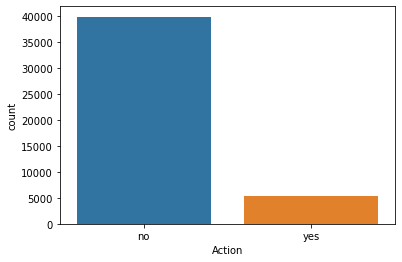

In [10]:
sns.countplot(banking.Action)

# we can observe there is a serious class imbalance.

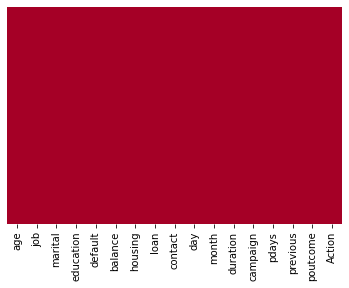

In [11]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')
# we can observe that there are no null values.

In [12]:
banking.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Action       0
dtype: int64

In [13]:
new_data =  banking.select_dtypes(include='object')

In [14]:
#checking the number of unique categories in each column
for i in new_data.columns:
    print(i,';',banking[i].unique(),' labels')

job ; ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']  labels
marital ; ['married' 'single' 'divorced']  labels
education ; ['tertiary' 'secondary' 'unknown' 'primary']  labels
default ; ['no' 'yes']  labels
housing ; ['yes' 'no']  labels
loan ; ['no' 'yes']  labels
contact ; ['unknown' 'cellular' 'telephone']  labels
month ; ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']  labels
poutcome ; ['unknown' 'failure' 'other' 'success']  labels
Action ; ['no' 'yes']  labels


In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

banking1[['pdays']] = scaler.fit_transform(banking1[['pdays']])

In [17]:
banking1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,58,2143,5,261,1,0.0,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,0.0,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,0.0,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,0.0,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,0.0,0,11,2,3,0,0,0,2,8,3,0


In [18]:
banking1.shape

(45211, 17)

# K Best Features

In [19]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif

In [20]:
X = banking1.drop(columns = ['Action'], axis = 1)
y = banking1['Action']

In [21]:
print(X.shape)
print(y.shape)

(45211, 16)
(45211,)


In [22]:
# Split the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [23]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (31647, 16)
y train shape :  (31647,)
X test shape :  (13564, 16)
y test shape :  (13564,)


In [24]:
Kbest = SelectKBest(f_classif, k = 10)
kfit = Kbest.fit(X_train, y_train)

In [25]:
kfit.scores_

array([  22.19569464,   82.97980937,   19.79376013, 5755.03779261,
        172.71229572,  340.81808245,  275.2094515 ,   57.49860406,
         75.20405254,  151.52843655,   16.59194018,  624.98386531,
        153.86343912,  690.37931111,   19.86633126,  193.36496968])

In [26]:
scores = pd.DataFrame(kfit.scores_)
columns = pd.DataFrame(list(X_train.columns[kfit.get_support()]))

In [27]:
scores.head()

,0
0,22.195695
1,82.979809
2,19.793760
3,5755.037793
4,172.712296


In [28]:
# Note since we provided k = 10, it has selected the 10 best features only.
print(columns)
print(columns.shape)

           0
0    balance
1   duration
2   campaign
3      pdays
4   previous
5  education
6    housing
7       loan
8    contact
9   poutcome
(10, 1)


In [29]:
# Train logistic regression model with subset of features from K Best
X_train, X_test = kfit.transform(X_train), kfit.transform(X_test)
X_train.shape

(31647, 10)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight = 'balanced', max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
# evaluating the model on training data.
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train)
print("Accuracy on Training data: ", accuracy_score(y_train, y_pred_train))

Accuracy on Training data:  0.7995702594242741


In [32]:
# evaluate the model on the testing data
y_pred_test = model.predict(X_test)
print("Accuracy on Testing data : ", accuracy_score(y_test, y_pred_test))

Accuracy on Testing data :  0.8017546446475966


In [33]:
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Forward Selection

In [34]:
# Train a logistic regression model here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)
print(X_train.shape)
model = LogisticRegression(class_weight = 'balanced', max_iter = 2000)
model.fit(X_train, y_train)

(31647, 16)


LogisticRegression(class_weight='balanced', max_iter=2000)

Here we can observe that in under 2000 iterations the model converges when we take all the features into account.
With the help of KBest, choosing 10 features and fitting the model on those 10 features resulted in convergence in under 1000 iterations only.

Also the accuracy of the model in both the cases is similar.
Hence, we can realize the importance of feature selection

In [35]:
# evaluating the model on training data.
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train)
print("Accuracy on Training data: ", accuracy_score(y_train, y_pred_train))

Accuracy on Training data:  0.7924605807817486


In [36]:
# evaluate the model on the testing data
y_pred_test = model.predict(X_test)
print("Accuracy on Testing data : ", accuracy_score(y_test, y_pred_test))

Accuracy on Testing data :  0.801091123562371


In [37]:
cols = list(X_train.columns)
print(cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [38]:
# Print the absolute weights of the model and sort them in descending order
weights = list(model.coef_[0])

In [39]:
print("Shape of weights : ", len(weights))
print("Weights : ", weights)

Shape of weights :  16
Weights :  [-0.0017293781967998693, 3.142005482902481e-05, -0.01043550982726513, 0.005176414963009845, -0.16258425562071668, 0.03982909480337777, 0.11513607720974263, 0.005944734663766763, 0.055029876337912495, 0.15024215265872598, -0.08377484048983437, -1.2579940815712345, -0.5774173310046898, -0.6909860145264065, 0.024758744779082603, -0.159563904335879]


In [40]:
# sorting the weights in descending order.
# weights.sort(reverse = True)
# print(weights)

In [40]:
# sorting 
idx = np.argsort(-np.array(weights))

weights = np.array(weights)[idx]
cols = np.array(cols)[idx]

In [58]:
orig_cols = cols

In [42]:
print(weights)
print(cols)

[ 1.58644150e-01  1.14984633e-01  6.05550378e-02  4.77174165e-02
  2.34046175e-02  5.34946421e-03  8.22115168e-04  2.86315028e-05
 -2.52050212e-03 -1.13631365e-02 -8.43711734e-02 -1.43103395e-01
 -1.64657210e-01 -6.29509035e-01 -6.76311714e-01 -1.27712645e+00]
['education' 'previous' 'marital' 'pdays' 'month' 'duration' 'job'
 'balance' 'age' 'day' 'default' 'campaign' 'poutcome' 'loan' 'contact'
 'housing']


In [41]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold
# Print the accuracies of all the models trained and names of the features used for each time
model = LogisticRegression(class_weight = 'balanced',  max_iter = 1000)
scores, features = [], []
for i in range(1, X_train.shape[1]):
    sfs = SequentialFeatureSelector(estimator = model, k_features = i, forward = True, scoring = 'accuracy', n_jobs = -1)
    sfs.fit(X_train, y_train)
    score = sfs.k_score_
    scores.append(sfs.k_score_)
    features.append(sfs.k_feature_names_)
    print("Part : ", i, " done!")

Part :  1  done!
Part :  2  done!
Part :  3  done!
Part :  4  done!
Part :  5  done!
Part :  6  done!
Part :  7  done!
Part :  8  done!
Part :  9  done!
Part :  10  done!
Part :  11  done!
Part :  12  done!
Part :  13  done!
Part :  14  done!
Part :  15  done!


In [42]:
# Print the accuracies of all the models trained and names of the features used for each time

for feature, score in zip(features, scores):
    print("No. of features : ", len(feature))
    print("Features : ", feature)
    print("Score : ", score)
    print("----------------------------------------")

No. of features :  1
Features :  ('duration',)
Score :  0.7893956079203106
----------------------------------------
No. of features :  2
Features :  ('duration', 'previous')
Score :  0.79742162821806
----------------------------------------
No. of features :  3
Features :  ('duration', 'previous', 'housing')
Score :  0.8024139639568805
----------------------------------------
No. of features :  4
Features :  ('duration', 'previous', 'housing', 'loan')
Score :  0.8041202598834772
----------------------------------------
No. of features :  5
Features :  ('balance', 'duration', 'previous', 'housing', 'loan')
Score :  0.8045626728390116
----------------------------------------
No. of features :  6
Features :  ('balance', 'duration', 'previous', 'default', 'housing', 'loan')
Score :  0.8047207056362087
----------------------------------------
No. of features :  7
Features :  ('balance', 'duration', 'previous', 'job', 'default', 'housing', 'loan')
Score :  0.8036780366311996
----------------

In [43]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time

index = np.argmax(np.array(scores))
print("Best Score : ", scores[index])
print("No.of features selected : ", len(features[index]))
print("Features selected : ", features[index])

Best Score :  0.8047207056362087
No.of features selected :  6
Features selected :  ('balance', 'duration', 'previous', 'default', 'housing', 'loan')


In [94]:
X = banking1.drop(columns = ['Action'], axis = 1)
y = banking1['Action']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [96]:
X_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [97]:
orig_cols = list(orig_cols)
print(type(orig_cols))
print(len(orig_cols))

<class 'list'>
16


In [98]:
print(orig_cols)

['education', 'previous', 'marital', 'pdays', 'month', 'job', 'duration', 'balance', 'age', 'day', 'default', 'poutcome', 'campaign', 'loan', 'contact', 'housing']


# Backward Elimination

In [100]:
# self code
train_acc, test_acc, features = [], [], []
for i in range(len(orig_cols) - 1, 0, -1):
    feature = []
    for j in range(i):
        feature.append(orig_cols[j])
    
    features.append(feature)    
    X_train_back = X_train[feature]
    X_test_back = X_test[feature]
    
    lr = LogisticRegression(class_weight = 'balanced', max_iter = 3000)
    lr.fit(X_train_back, y_train)
    
    train_acc.append(accuracy_score(y_train, lr.predict(X_train_back)))
    test_acc.append(accuracy_score(y_test, lr.predict(X_test_back)))
    print("Part ", i, " done!")

Part  15  done!
Part  14  done!
Part  13  done!
Part  12  done!
Part  11  done!
Part  10  done!
Part  9  done!
Part  8  done!
Part  7  done!
Part  6  done!
Part  5  done!
Part  4  done!
Part  3  done!
Part  2  done!
Part  1  done!


In [136]:
# Print the accuracies of all the models trained and names of the features used for each time
for i, feature in enumerate(features):
    print("No. of features : ", len(feature))
    print("Features : ", feature)
    print("Training score : ", train_acc[i])
    print("Testing score : ", test_acc[i])
    print("------------------------------------------------------")

No. of features :  15
Features :  ['education', 'previous', 'marital', 'pdays', 'month', 'job', 'duration', 'balance', 'age', 'day', 'default', 'poutcome', 'campaign', 'loan', 'contact']
Training score :  0.791007046481499
Testing score :  0.7929076968445886
------------------------------------------------------
No. of features :  14
Features :  ['education', 'previous', 'marital', 'pdays', 'month', 'job', 'duration', 'balance', 'age', 'day', 'default', 'poutcome', 'campaign', 'loan']
Training score :  0.7799159477991595
Testing score :  0.7817752875258036
------------------------------------------------------
No. of features :  13
Features :  ['education', 'previous', 'marital', 'pdays', 'month', 'job', 'duration', 'balance', 'age', 'day', 'default', 'poutcome', 'campaign']
Training score :  0.7917022150598793
Testing score :  0.7957092303155411
------------------------------------------------------
No. of features :  12
Features :  ['education', 'previous', 'marital', 'pdays', 'month

In [137]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time

index = np.argmax(np.array(test_acc))
print("Best Score : ", scores[index])
print("No.of features selected : ", len(features[index]))
print("Features selected : ", features[index])

Best Score :  0.8010868498950516
No.of features selected :  8
Features selected :  ['education', 'previous', 'marital', 'pdays', 'month', 'job', 'duration', 'balance']


In [46]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 

# from mlxtend.feature_selection import SequentialFeatureSelector

# # Print the accuracies of all the models trained and names of the features used for each time
# model1 = LogisticRegression(class_weight = 'balanced',  max_iter = 5000)
# sfs1 = SequentialFeatureSelector(estimator = model1, k_features = 13, forward = False, scoring = 'accuracy', n_jobs = -1)
# sfs1.fit(X_train, y_train)
# score = sfs.k_score_
# features = sfs.k_feature_names_

# print("Score : ", score)
# print("Features : ", features)

Score :  0.7929661177503091
Features :  ('age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome')


# Recursive Feature Elimination. 
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [101]:
X = banking1.drop(columns = ['Action'], axis = 1)
y = banking1['Action']
logit = LogisticRegression(class_weight = 'balanced', max_iter = 4000)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [103]:
rfe = RFE(estimator = logit, step=1) # by default half of the features are selected
rfe = rfe.fit(X_train, y_train)

In [104]:
cols = pd.DataFrame(X_train.columns)
ranking = pd.DataFrame(rfe.ranking_)

In [105]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [106]:
rankings_of_features

,0,0
0,age,5
1,balance,9
2,day,6
3,duration,8
4,campaign,3
5,pdays,1
6,previous,2
7,job,7
8,marital,1
9,education,1


In [107]:
rankings_of_features.columns = ['Feature name', 'Rank Order']

In [108]:
# estimated 7 best features are ranked 1
rankings_of_features

,Feature name,Rank Order
0,age,5
1,balance,9
2,day,6
3,duration,8
4,campaign,3
5,pdays,1
6,previous,2
7,job,7
8,marital,1
9,education,1


In [109]:
print(rankings_of_features.nlargest(5,'Rank Order'))
#remember this gives wrong results

  Feature name  Rank Order
1      balance           9
3     duration           8
7          job           7
2          day           6
0          age           5


In [110]:
rankings_of_features.sort_values(by='Rank Order')

,Feature name,Rank Order
5,pdays,1
8,marital,1
9,education,1
10,default,1
11,housing,1
12,loan,1
13,contact,1
15,poutcome,1
6,previous,2
4,campaign,3


In [111]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(X_train)
X_testRFE = rfe.transform(X_test)

In [112]:
print("X train shape : ", X_train.shape)
print("X train RFE shape : ", X_trainRFE.shape)

X train shape :  (31647, 16)
X train RFE shape :  (31647, 8)


In [113]:
model = logit.fit(X_trainRFE, y_train)

In [114]:
# evaluating the model on training data.
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_trainRFE)
print("Accuracy on Training data: ", accuracy_score(y_train, y_pred_train))

Accuracy on Training data:  0.6248933548203621


In [115]:
# evaluating the model on testing data.
from sklearn.metrics import accuracy_score
y_pred_test = model.predict(X_testRFE)
print("Accuracy on Training data: ", accuracy_score(y_test, y_pred_test))

Accuracy on Training data:  0.6250368622825125


In [116]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [117]:
#score = logit.score(X_test_rfecv, y_test)
score = cross_val_score(model, X_testRFE, y_test) 
print(score)

[0.63730188 0.63103575 0.63472171 0.62034648 0.62536873]


In [118]:
print(np.mean(score))

0.6297549110749402


# RFE using cross validation

In [119]:
X_train.shape

(31647, 16)

In [120]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

In [123]:
rfecv.grid_scores_

array([0.78794163, 0.53085546, 0.5854578 , 0.63648964, 0.63658441,
       0.63983925, 0.63361451, 0.64274617, 0.63680567, 0.63879651,
       0.63784855, 0.63693218, 0.63661624, 0.73722701, 0.80551059,
       0.79776893])

In [127]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [128]:
X_train_rfecv.shape

(31647, 15)

In [129]:
model = logit.fit(X_train_rfecv, y_train)

In [130]:
# evaluating the model on training data.
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train_rfecv)
print("Accuracy on Training data: ", accuracy_score(y_train, y_pred_train))

Accuracy on Training data:  0.8065535437798211


In [131]:
# evaluating the model on testing data.
from sklearn.metrics import accuracy_score
y_pred_test = model.predict(X_test_rfecv)
print("Accuracy on Training data: ", accuracy_score(y_test, y_pred_test))

Accuracy on Training data:  0.8074314361545267


In [132]:
y_pred_RFECV = logit.predict(X_test_rfecv)

In [133]:
#score = logit.score(X_test_rfecv, y_test)
score = cross_val_score(model, X_test_rfecv, y_test) 
print(score)

[0.81127903 0.80575009 0.81422779 0.80759307 0.80752212]


In [134]:
print(np.mean(score))

0.8092744210928045
